Outlier detection and removal using z_score and standard deviation in python pandas

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(10,6)

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/FeatureEngineering/2_outliers_z_score/heights.csv")
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [3]:
df.shape

(10000, 2)

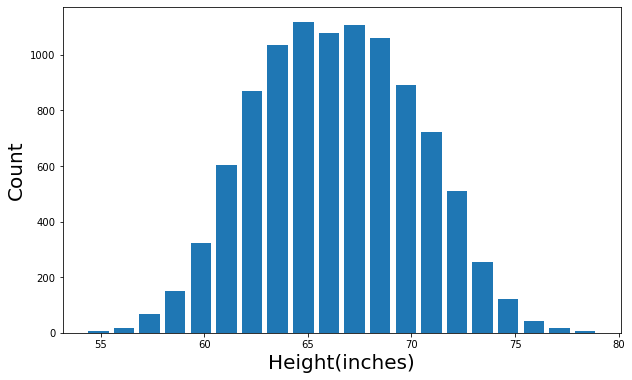

In [4]:
plt.hist(df.height,bins=20,rwidth=.8)
plt.xlabel('Height(inches)',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

Plot bell curve along with histogram for our dataset

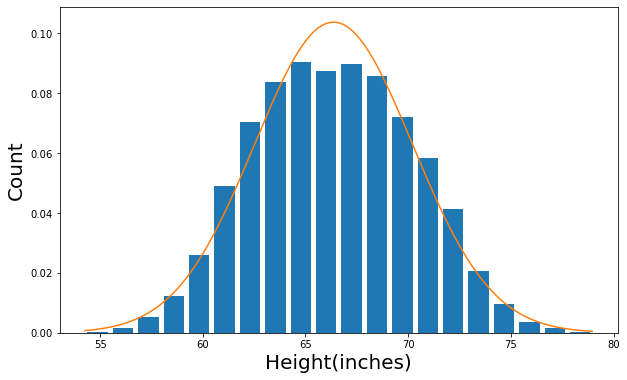

In [5]:
from scipy.stats import norm
import numpy as np
plt.hist(df.height,bins=20,rwidth=.8,density=True)
plt.xlabel('Height(inches)',fontsize=20)
plt.ylabel('Count',fontsize=20)

rng=np.arange(df.height.min(),df.height.max(),0.1)
plt.plot(rng,norm.pdf(rng,df.height.mean(),df.height.std()))

In [6]:
df.height.mean()

66.3675597548656

In [7]:
df.height.std()

3.847528120795573

In [8]:
df.height.min()

54.26313333

In [9]:
df.height.max()

78.99874235

# 01.Outlier detection and removal using 3 standard deviation

In [10]:
upper_limit=df.height.mean()+3*df.height.std()
upper_limit

77.91014411725232

In [11]:
lower_limit=df.height.mean()-3*df.height.std()
lower_limit

54.824975392478876

Here are the outliers that are beyond 3 std dev from mean

In [12]:
df[(df.height>upper_limit) | (df.height>lower_limit)]

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


Now remove these outliers and generate new dataframe

In [13]:
df_no_outlier_std_dev=df[(df.height<upper_limit) & (df.height>lower_limit)]
df_no_outlier_std_dev

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [14]:
df_no_outlier_std_dev.shape

(9993, 2)

# 02.Outlier detection and removal using Z score


In [15]:
df['zscore']=(df.height - df.height.mean())/df.height.std()
df.head(5)

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [16]:
df[df['zscore']>3]


,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [17]:
df[df['zscore']<-3]


,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [18]:
df[(df.zscore<-3) | (df.zscore>3)]


,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


Remove the outliers and produce new dataframe

In [19]:
df_no_outliers = df[(df.zscore>-3) & (df.zscore<3)]
df_no_outliers.head()


,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [20]:
df_no_outliers.shape


(9993, 3)